# DSSS Workshop | House Prices

**GOAL:**

* Data Pre-processing
* Exploratory Data Analysis
* Statistical concepts like skew, kurtosis, correlation, cross-validation and more
* Multiple Linear Regression
* Learning about Overfitting/Underfitting
* Regularization (Optional)
* Submit and see our results




# A) Importing Dependencies


In [ ]:
# Fundamental
import numpy as np
import pandas as pd
import datetime

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={"figure.figsize":(15, 10)})

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Miscellaneous
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Loading the train dataset
train = pd.read_csv("train.csv")

# Loading the test dataset
test = pd.read_csv("test.csv")

# B) Exploratory Data Analysis


In [ ]:
# Viewing the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Viewing the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


> *To learn more about why we do a test-train split, refer to the following article - [Train Test Validation Split: How To & Best Practices](https://www.v7labs.com/blog/train-validation-test-set#:~:text=The%20main%20idea%20of%20splitting,it%20has%20not%20seen%20before.)*



## Sale Price

In [ ]:
y = train['SalePrice']

In [ ]:
#descriptive summary of the response variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Sale Price vs Numerical Variables

In [ ]:
numCols = train.select_dtypes("number").columns
print("number of numerical columns: ", len(numCols), "\n")
numCols

number of numerical columns:  38 



Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

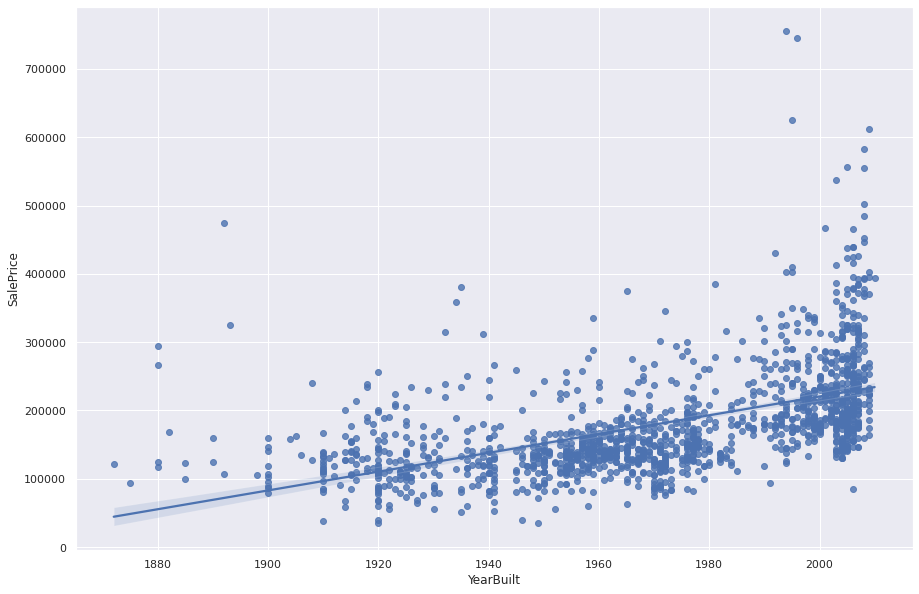

In [ ]:
#scatter plot YearBuilt/saleprice
var = 'YearBuilt'
t_data = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.regplot(x=var, y='SalePrice', data=t_data);

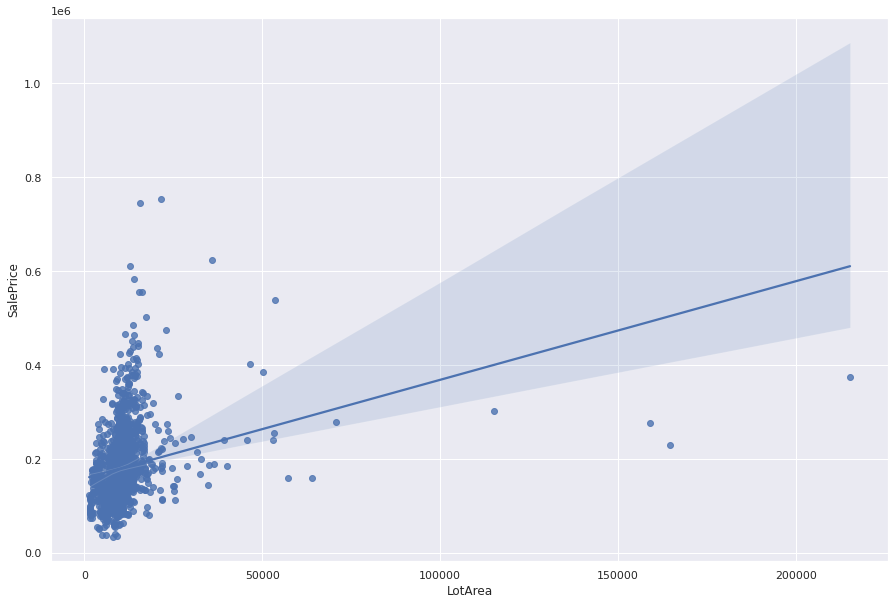

In [ ]:
#scatter plot LotArea/saleprice
var = 'LotArea'
t_data = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.regplot(x=var, y='SalePrice', data=t_data);

### Sale Price vs Categorical Variables

In [ ]:
objCols = train.select_dtypes("object").columns
print("number of numerical columns: ", len(objCols), "\n")
objCols

number of numerical columns:  43 



Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

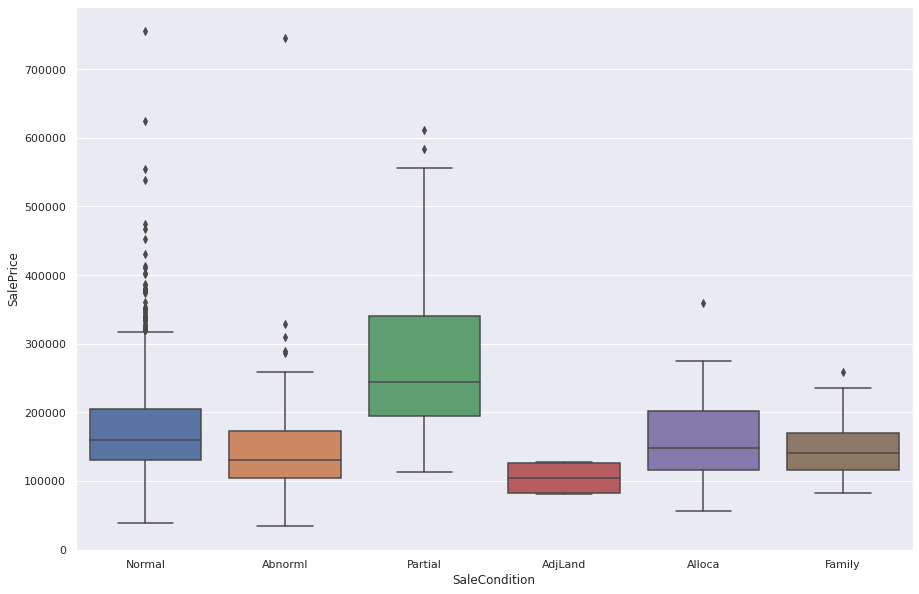

In [ ]:
#box plot SaleCondition/saleprice
var = 'SaleCondition'
t_data_1 = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.boxplot(x=var, y="SalePrice", data=t_data_1)

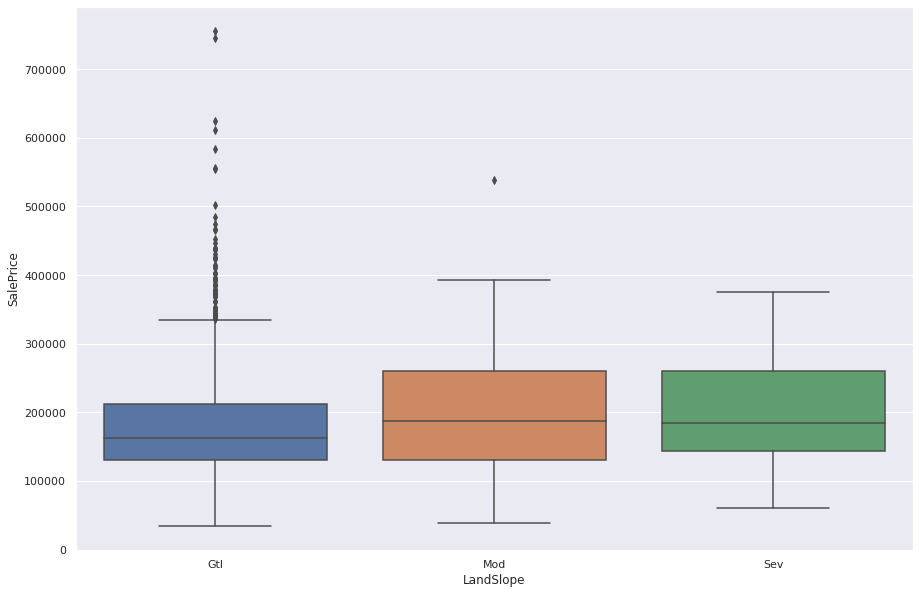

In [ ]:
#box plot LandSlope/saleprice
var = 'LandSlope'
t_data_1 = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.boxplot(x=var, y="SalePrice", data=t_data_1)

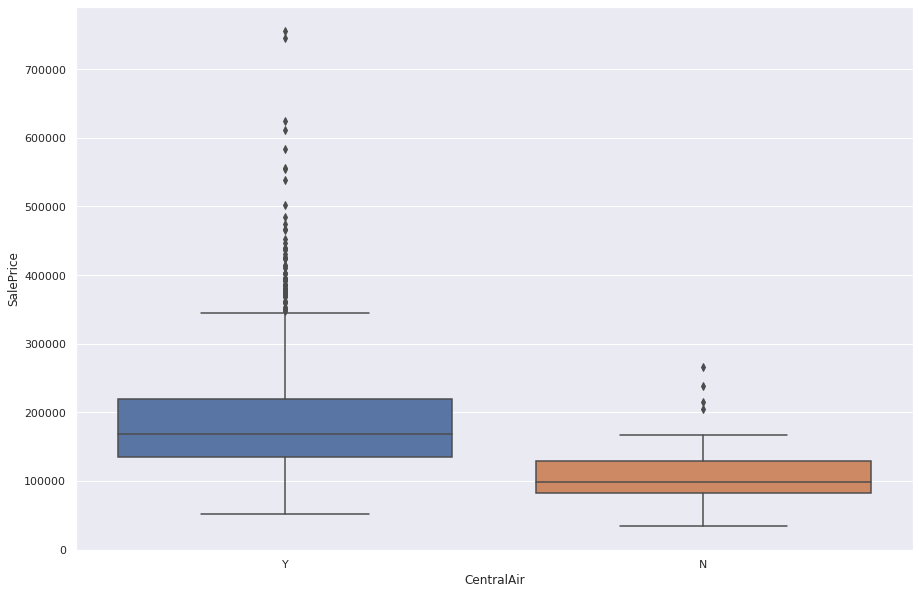

In [ ]:
#bargraph CentralAir/saleprice
var = 'CentralAir'
t_data_1 = pd.concat([train['SalePrice'], train[var]], axis=1)
sns.boxplot(x=var, y="SalePrice", data=t_data_1)

# C) Data Cleaning and Feature Engineering

## Missing Data

In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


**Detailed Explaination on missing data**

**Author: Pedro Marcelino, PHD**

**Source: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#'SalePrice',-her-buddies-and-her-interests**


*Let's analyse this to understand how to handle the missing data.*

*We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them. In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in 5 problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables. Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'. Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.*

*In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.*

In [ ]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...

0

## Categorical Data

Convert numerical data into categorical.

In [ ]:
train = train.replace({
                       "MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},

                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

Convert categorical data into numeric.

In [ ]:
train = train.replace({
                       "Alley" : {"Grvl" : 1, "Pave" : 2},

                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},

                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},

                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},

                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},

                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},

                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},

                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},

                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},

                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},

                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},

                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},

                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},

                       "Street" : {"Grvl" : 1, "Pave" : 2},

                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},

                       "HasMasVnr" : {"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0},

                       "BoughtOffPlan" : {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1}
                       })

## Dimensionality Reduction (Simplification of existing features)

In [ ]:
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })


train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 2, 3 : 2, # average
                                                       4 : 3, 5 : 3 # good
                                                      })

train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })

train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })

train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 2, 3 : 2, # average
                                                   4 : 3, 5 : 3 # good
                                                  })

"On the other hand, reducing the number of features can make your machine learning model simpler, more efficient, and less data-hungry. The problems caused by too many features are often referred to as the “curse of dimensionality,” and they're not limited to tabular data."

Author - Ben Dickson

Link - https://bdtechtalks.com/2021/05/13/machine-learning-dimensionality-reduction/

## Combinations of existing features

In [ ]:
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]

train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]

train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]

train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]

train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]

train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]

train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])

train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]

train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]

train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]

## Feature Transformation (Polynomials)

In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")

Train has 1459 rows and 80 columns


In [ ]:
print("relevance of features to our target variable")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

relevance of features to our target variable
SalePrice            1.000000
OverallQual          0.791069
AllSF                0.779104
AllFlrsSF            0.716876
GrLivArea            0.708618
ExterQual            0.682677
SimplOverallQual     0.662689
KitchenQual          0.659814
GarageCars           0.640473
TotalBath            0.631809
GarageArea           0.623423
SimplExterQual       0.615359
TotalBsmtSF          0.613905
1stFlrSF             0.605968
ExterGrade           0.576309
SimplKitchenQual     0.571367
OverallGrade         0.565367
FullBath             0.560881
TotRmsAbvGrd         0.533779
YearBuilt            0.523273
YearRemodAdd         0.507430
SimplExterGrade      0.493352
SimplOverallGrade    0.470804
Fireplaces           0.466968
HeatingQC            0.427639
KitchenScore         0.406924
BsmtFinSF1           0.386436
SimplKitchenScore    0.364740
SimplHeatingQC       0.356943
WoodDeckSF           0.324422
2ndFlrSF             0.319464
OpenPorchSF          0.31

Polynomials on the top 10 features

In [ ]:
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])

"Linear regression is linear in the model parameters and adding polynomial terms to the model can be an effective way of allowing the model to identify nonlinear patterns."

Author - Max Kuhn, Kjell Johnson

Book - Feature Engineering and Selection: A Practical Approach for Predictive Models (Chapman & Hall/CRC Data Science Series)


In [ ]:
categorical_features = train.select_dtypes(include = ["object"]).columns

numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice") # Done to interpret response variables

print("Our data has =>")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Our data has =>
Numerical features : 59
Categorical features : 20


## Dummy Variables

In [ ]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 0
Remaining NAs for categorical features in train : 0


# D) Machine Learning

## Multiple Linear Regression

### Assumptions

In [ ]:
# Gives us information about the features.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1459 non-null   int64  
 1   MSSubClass         1459 non-null   object 
 2   MSZoning           1459 non-null   object 
 3   LotArea            1459 non-null   int64  
 4   Street             1459 non-null   int64  
 5   LotShape           1459 non-null   int64  
 6   LandContour        1459 non-null   object 
 7   Utilities          1459 non-null   int64  
 8   LotConfig          1459 non-null   object 
 9   LandSlope          1459 non-null   int64  
 10  Neighborhood       1459 non-null   object 
 11  Condition1         1459 non-null   object 
 12  Condition2         1459 non-null   object 
 13  BldgType           1459 non-null   object 
 14  HouseStyle         1459 non-null   object 
 15  OverallQual        1459 non-null   int64  
 16  OverallCond        1459 



Assumptions of Regression-


1.   **Linearity** - There must be a linear relationship between the outcome variable and the independent variables. Scatterplots can show whether there is a linear or curvilinear relationship.



2. **Multivariate Normality** - Multiple regression assumes that the residuals are normally distributed. Bargraphs and Q-Q plots are a good ways to make assumptions on normality.

3. **No or little Multicollinearity** - Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.

Additionaly,

4. **Homoscedasticity/Heteroscedasticity**

5. **Independence of Errors (iid's)**






#### Linearity

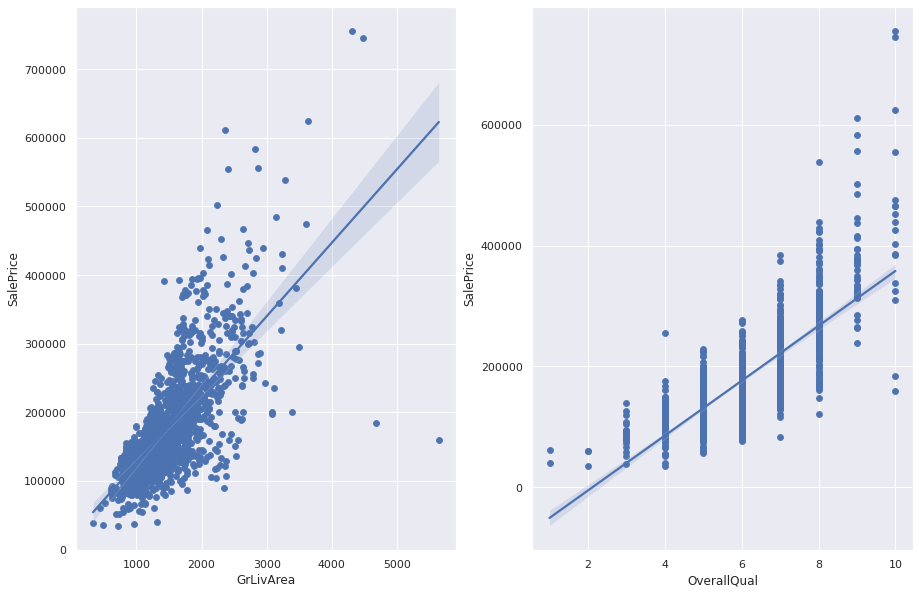

In [ ]:
## Plot sizing.
fig, (ax1, ax2) = plt.subplots(figsize = (15,10), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea.
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line.
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and OverallQual.
sns.scatterplot(x = train.OverallQual,y = train.SalePrice, ax=ax2)
## regression line for OverallQual and SalePrice.
sns.regplot(x=train.OverallQual, y=train.SalePrice, ax=ax2);

Here we are plotting our target variable with two independent variables GrLivArea and MasVnrArea. It's pretty apparent from the chart that there is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea. Similar pattern can be noticed for other features.




One thing to take note here, there are some outliers in the dataset. It is imperative to check for outliers since linear regression is sensitive to outlier effects.

#### Normality

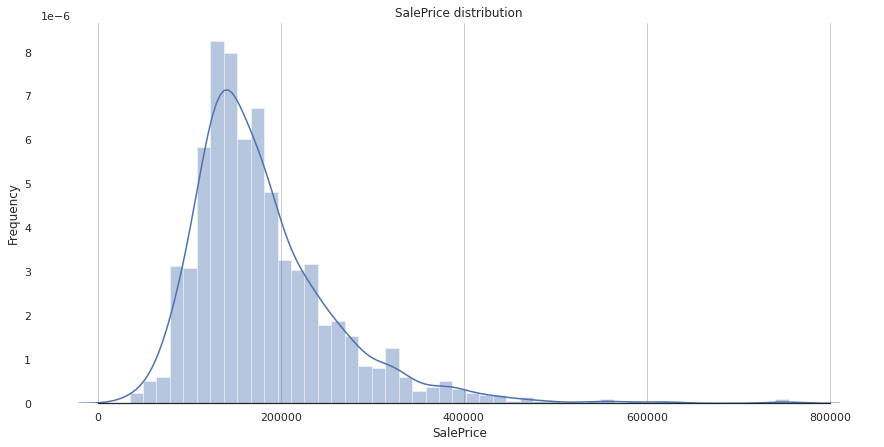

Skewness: 1.881943
Kurtosis: 6.529263


In [ ]:
# Vizualizating Sale Price: the variable we're trying to predict¶

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(15, 7))

# Visualizing SalePrice: the variable we're trying to predict
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

# Skew: the degree of asymmetry observed in a probability distribution
# If the number is greater than +1 or lower than –1, indication of a substantially skewed distribution.
print("Skewness: %f" % train['SalePrice'].skew())

# Kurtosis: a measure of the "tailedness" of the probability distribution of a real-valued random variable
# if the number is greater than +1, the distribution is too peaked. If it is less than –1, the distribution is too flat.
print("Kurtosis: %f" % train['SalePrice'].kurt())

**Big Takeaway:**

Our target variable, SalePrice is not normally distributed.

> *To learn more about Normal Distributions, refer to the following article - [Clearly explained: Normal distributions
](https://towardsdatascience.com/clearly-explained-normal-distributions-and-the-central-limit-theorem-8d7cc5a6052f)*

>*To learn more about Skewness and Kurtosis, refer to the following article - [Measures of Shape: Skewness and Kurtosis
](https://brownmath.com/stat/shape.htm)*

'SalePrice' is not normal. It shows 'peakedness', positive skewness and kurtosis and does not follow the diagonal line.

A simple data transformation can solve this problem. We use the log-transformation in this case.


In [ ]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])
y = train['SalePrice']

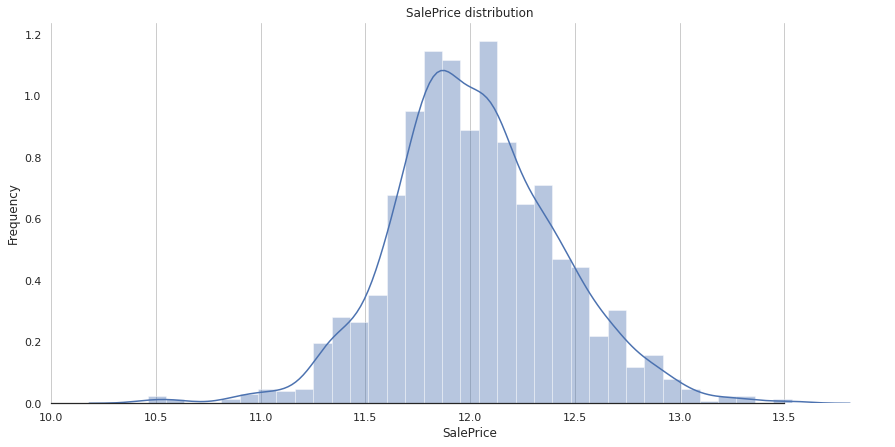

Skewness: 0.121318
Kurtosis: 0.806928


In [ ]:
# Vizualizating Sale Price: the variable we're trying to predict¶

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(15, 7))

# Visualizing SalePrice: the variable we're trying to predict
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

# Skew: the degree of asymmetry observed in a probability distribution
# If the number is greater than +1 or lower than –1, indication of a substantially skewed distribution.
print("Skewness: %f" % train['SalePrice'].skew())

# Kurtosis: a measure of the "tailedness" of the probability distribution of a real-valued random variable
# if the number is greater than +1, the distribution is too peaked. If it is less than –1, the distribution is too flat.
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [ ]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])


46 skewed numerical features to log transform


#### Multicollinearity

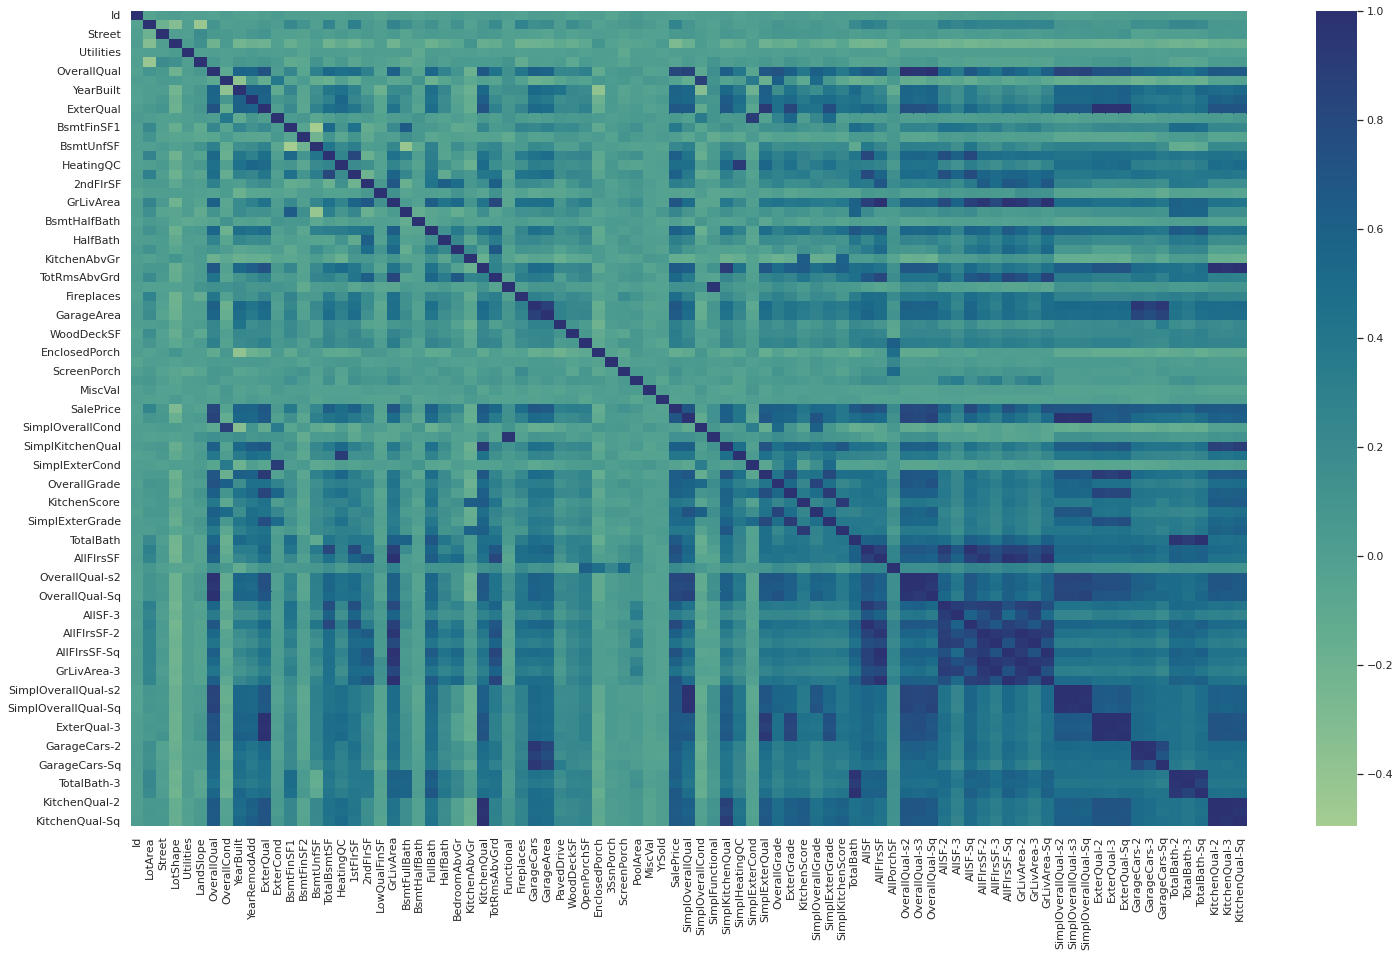

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corrmat, cmap="crest")

Noteable observations-

1. There is 0.83 or 83% correlation between GarageYrBlt and YearBuilt.
2. 83% correlation between TotRmsAbvGrd and GrLivArea.
3. 89% correlation between GarageCars and GarageArea.


Multicollinearity is a problem because it undermines the statistical significance of an independent variables by makeing them vague, imprecise, and unreliable. This inflates the standard errors of some or all of the regression coefficients.

How to solve -
1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
4. LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.

Author -  Jim Frost

Source - https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/




## Data Modelling

In [ ]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 234


In [ ]:
# Partition the dataset in train + validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1021, 234)
X_test : (438, 234)
y_train : (1021,)
y_test : (438,)


### Standardization (Throwback to the assumption of Normality)

In [ ]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on some observations that will later be used in the test set.



### Evaluation Metric (RMSE)

RMSE = square root of mean squared error. It is the absolute measure of the goodness for the fit.


In [ ]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

More on Mean Square Error (MSE) and Root Mean Square Error (RMSE) =>

"MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation."

Author - Songhao Wu

Link - https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b



"Advantages of RMSE: The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

Disadvantages of RMSE: It is not that robust to outliers as compared to MAE."

Author - Raghav Agrawal

Link - https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

## ML Without regularization

Linear Regression without regularization

RMSE on Training set : 5399494608.897084
RMSE on Test set : 314299891668.6041


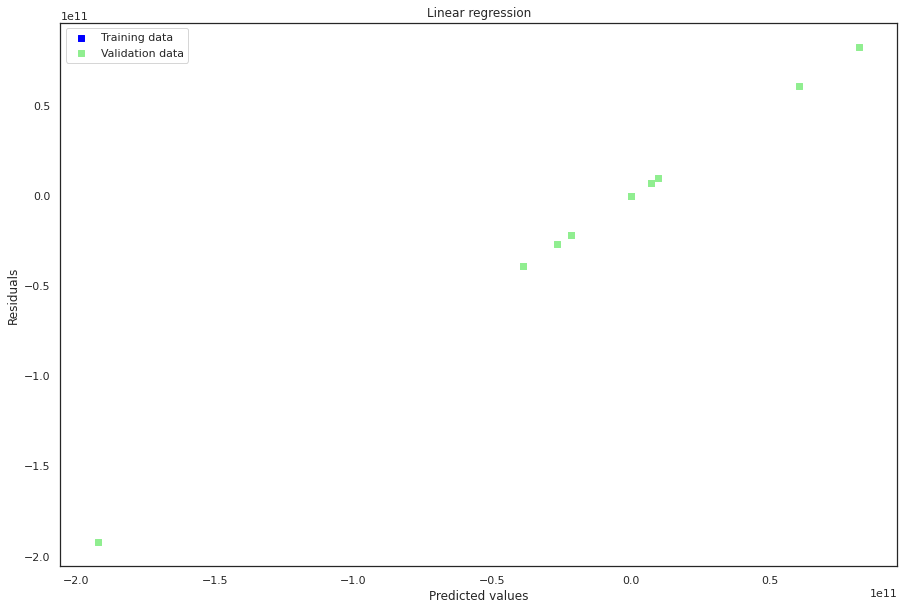

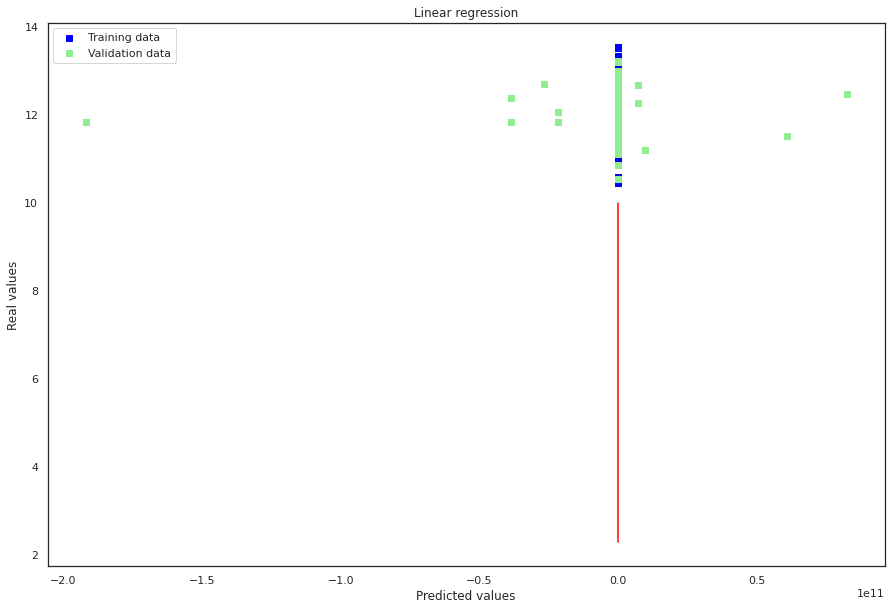

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.3, xmax =  10, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.3, 2.65], [2.3, 10], c = "red")
plt.show()

Errors seems to be randomly distributed and randomly scattered around the centerline. It means our model was able to capture most of the explanatory information.



## Over-Fitting and Under-Fitting

Overfitting: Good performance on the training data, poor generliazation to other data.

Underfitting: Poor performance on the training data and poor generalization to other data


Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

Author - Jason Brownlee

Link - https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/#:~:text=Overfitting%3A%20Good%20performance%20on%20the,poor%20generalization%20to%20other%20data



Underfitting in Machine Learning
Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

Author - Jason Brownlee

Link - https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/#:~:text=Overfitting%3A%20Good%20performance%20on%20the,poor%20generalization%20to%20other%20data



### Regularization

Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

Author - Sebastian Raschka

Book - Python Machine Learning




Code for Regularization portion of this notebook has been taken from Juliencs "Study on Regression applied to the Ames dataset" Notebook.

Link - https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

#### Linear Regression with Ridge regularization (L2 penalty)



Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 6.8999999999999995
Ridge RMSE on Training set : 0.01128367790781842
Ridge RMSE on Test set : 0.010036025699247459


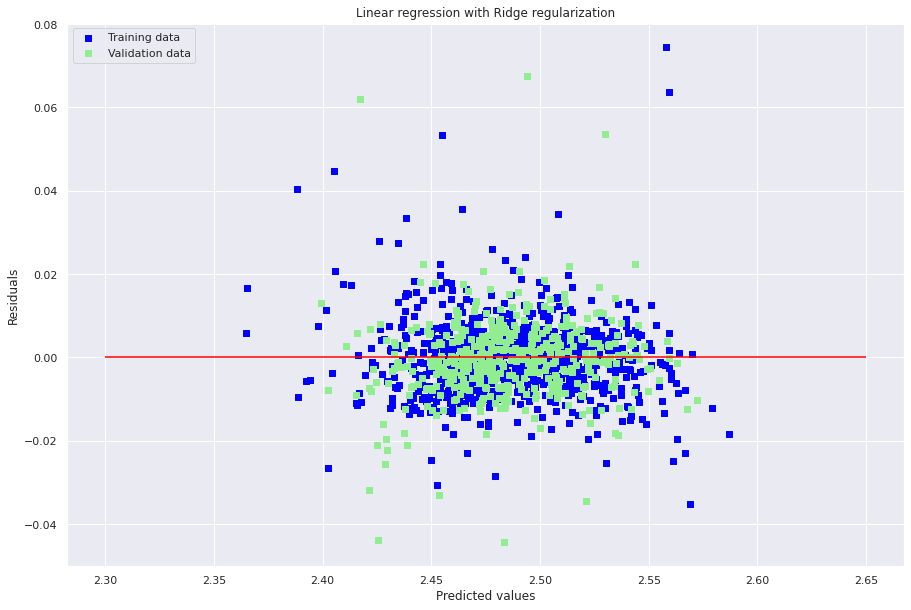

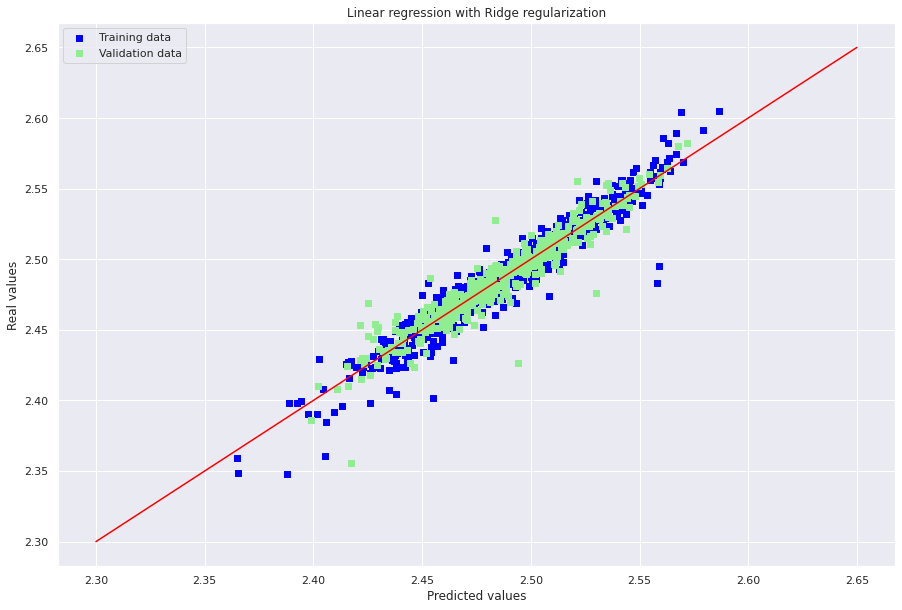

Ridge picked 252 features and eliminated the other 9 features


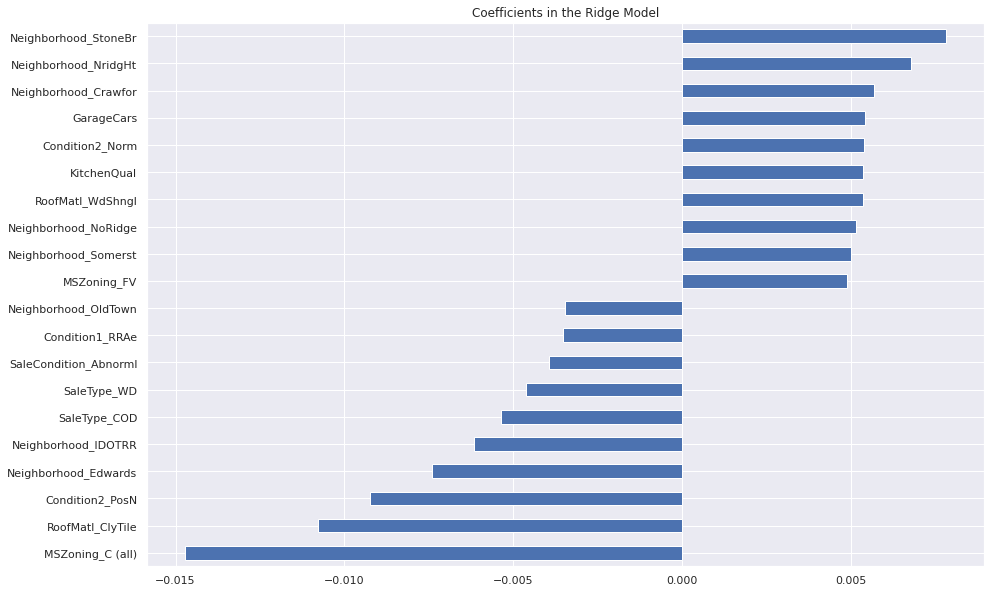

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.3, xmax = 2.65, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.3, 2.65], [2.3, 2.65], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

We're getting a much better RMSE result now that we've added regularization. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea.

Ridge used almost all of the existing features.



#### Linear Regression with Lasso regularization (L1 penalty)



LASSO stands for Least Absolute Shrinkage and Selection Operator. It is an alternative regularization method, where we simply replace the square of the weights by the sum of the absolute value of the weights. In contrast to L2 regularization, L1 regularization yields sparse feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 0.010743779976333497
Lasso RMSE on Test set : 0.009916671625104385


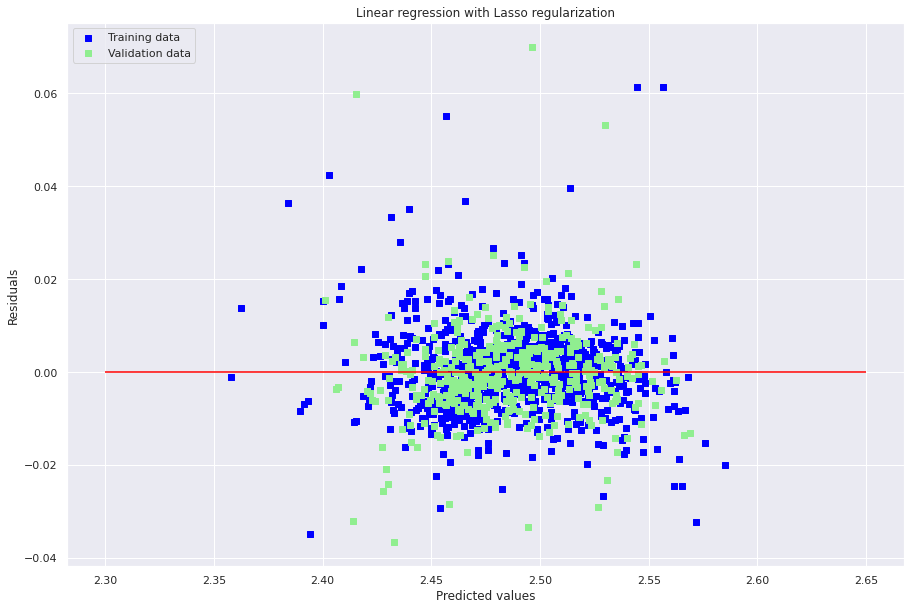

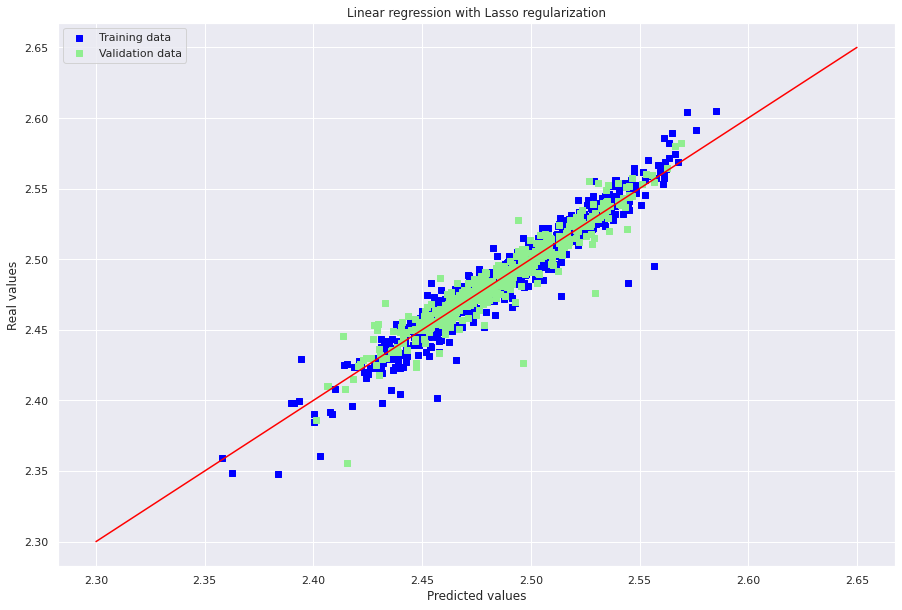

Lasso picked 93 features and eliminated the other 168 features


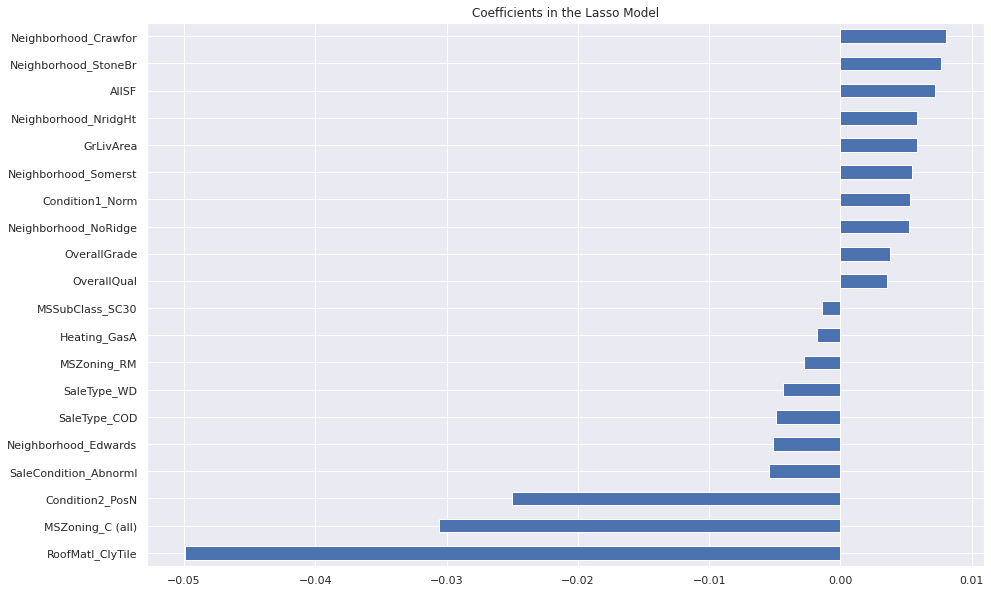

In [ ]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                          0.3, 0.6, 1],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8,
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05,
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35,
                          alpha * 1.4],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.3, xmax = 2.65, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.3, 2.65], [2.3, 2.65], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

RMSE results are better both on training and test sets. The most interesting thing is that Lasso used only one third of the available features. Another interesting tidbit : it seems to give big weights to Neighborhood categories, both in positive and negative ways. Intuitively it makes sense, house prices change a whole lot from one neighborhood to another in the same city.

The "MSZoning_C (all)", "Condition2_PosN", "RoofMati_Cly_Tile" features seems to have a disproportionate impact compared to the others.



#### Linear Regression with ElasticNet regularization (L1 and L2 penalty)



Best l1_ratio : 0.3
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.345
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.345 and alpha centered around 0.0001
Best l1_ratio : 0.345
Best alpha : 0.0001
ElasticNet RMSE on Training set : 0.010558021311330532
ElasticNet RMSE on Test set : 0.010215705161575907


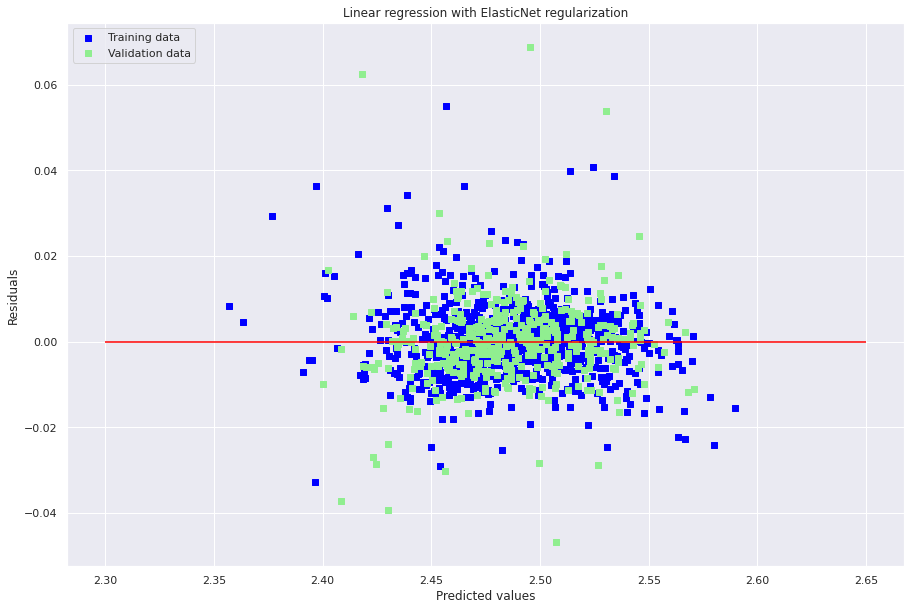

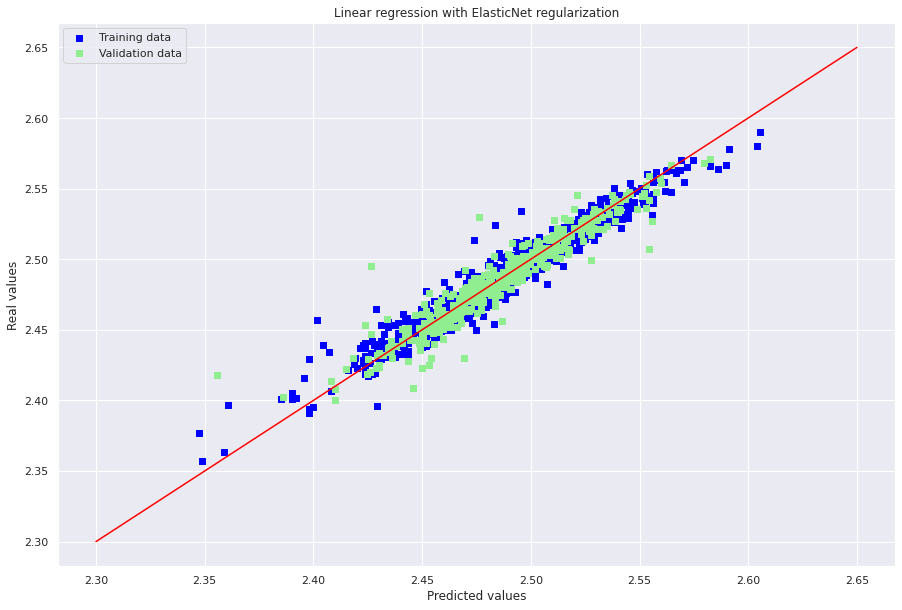

ElasticNet picked 118 features and eliminated the other 143 features


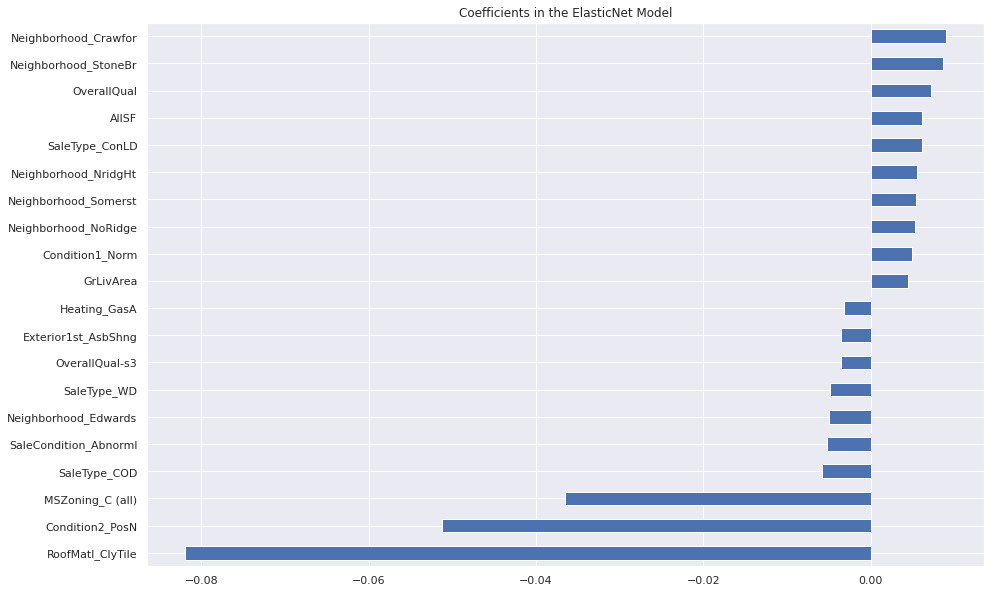

In [ ]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006,
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) +
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9,
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3,
                                    alpha * 1.35, alpha * 1.4],
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.3, xmax = 2.65, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.3, 2.65], [2.3, 2.65], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

The optimal L1 ratio used by ElasticNet here is equal to 1, which means it is exactly equal to the Lasso regressor we used earlier (and had it been equal to 0, it would have been exactly equal to our Ridge regressor). The model didn't need any L2 regularization to overcome any potential L1 shortcoming.


# **References**

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#2.-First-things-first:-analysing-'SalePrice'

https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

https://www.kaggle.com/code/apapiu/regularized-linear-models

https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing

https://www.kaggle.com/code/masumrumi/a-detailed-regression-guide-with-house-pricing#$R^2$(The-%22Coefficient-of-determination%22):
